# Convert Relative Humidity into PWV
======================================================

This conversion is usefull for simulating 


- author Sylvie Dagoret-Campagne
- date 22 juin 2017


## L'humidité spécifique 

https://fr.wikipedia.org/wiki/Humidit%C3%A9_sp%C3%A9cifique


- ${\displaystyle HS~}$ ou  ${\displaystyle q~}$ ou teneur en eau ${\displaystyle Y~}$  est définie comme **le rapport de la masse d'eau dans l'air sur la masse d'air humide**. 
- Contrairement au rapport de mélange qui décrit la masse d'eau dans l'air sur la masse d'air sec.

## Approximation de l'humidité spécifique

En notant 

- ${\displaystyle p}$  la pression de l'air et 
- ${\displaystyle e}$  la pression partielle de vapeur d'eau, 

on peut calculer l'humidité spécifique à partir de la formule suivante :

$
{\displaystyle q\approx {\frac {0{,}622\cdot e}{p-0{,}378\cdot e}}~} 
$

## Humidité specifique à la pression de vapeur saturante

En notant ${\displaystyle E}$ la pression de vapeur saturante, l'humidité spécifique à saturation ${\displaystyle q_{s}~}$  est donc par définition :

$
 {\displaystyle q_{s}\approx {\frac {0{,}622\cdot E}{p-0{,}378\cdot E}}~} 
$

## Conversions

D'après les formules empiriques de Nadeau et Puiggali1, l'humidité spécifique peut être exprimée en fonction de l'humidité relative par la relation :

Avec :

- *HR* l'humidité relative [valeur entre 0 et 1]
- *HS*, l'humidité spécifique en kg(eau) / kg(air sec) ${\displaystyle \scriptstyle {\rm {kg_{eau}/kg_{air\,sec}}}} {\displaystyle \scriptstyle {\rm {kg_{eau}/kg_{air\,sec}}}}$

- ${\displaystyle \theta }$, la température en °C (comprise entre 0 et 45 °C)
- ${\displaystyle p_{sat}\left(\theta \right)}$, la pression de vapeur saturante en Pa.




$
{\displaystyle HS={\frac {0,622\times p_{sat}\left(\theta \right)\times HR}{101\,325-p_{sat}\left(\theta \right)\times HR}}} 
$

$
 {\displaystyle p_{sat}\left(\theta \right)=\exp \left({23,3265-{\frac {3\,802,7}{\theta +273,18}}-\left({\frac {472,68}{\theta +273,18}}\right)^{2}}\right)} 
 $

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
import astropy.units as u
import astropy.constants as const

In [3]:
import air 
import humidity as hum

In [4]:
!ls

ConvertRHToPWV.ipynb air.pyc              humidity.pyc
README.md            atmprofiles_ctio.txt
air.py               humidity.py


In [5]:
!head atmprofiles_ctio.txt

# ----------------------------------------------------------------------------------------------------------------------------------------
#  lc |  z[km]  |  Pressure  | Temp.  |    Air      |   Ozone     |     O2      | Water vap.  |    CO2      |    NO2      |      O4      |
#     |         |   [hPa]    |  [K]   |   [cm-3]    |   [cm-3]    |   [cm-3]    |   [cm-3]    |   [cm-3]    |   [cm-3]    | [1.0e+46cm-6]|
# ----------------------------------------------------------------------------------------------------------------------------------------
    0  120.0000     0.00003   360.00   5.11026e+11   2.55700e+02   3.70765e+10   1.02280e+05   1.78990e+07   7.72214e+01   1.37467e-25
    1  115.0000     0.00004   300.00   9.68133e+11   4.84400e+03   9.10672e+10   2.32512e+05   3.87520e+07   1.50164e+02   8.29324e-25
    2  110.0000     0.00007   240.00   2.14269e+12   1.07200e+05   2.57280e+11   6.00320e+05   1.28640e+08   3.40896e+02   6.61930e-24
    3  105.0000     0.00014   208.80   

In [6]:
!tail atmprofiles_ctio.txt

   43    6.0000   472.20001   249.20   1.37243e+19   5.64578e+11   2.86957e+18   1.27057e+16   4.53090e+15   3.15790e+08   8.23443e-10
   44    5.0000   540.50000   255.70   1.53101e+19   5.77258e+11   3.20188e+18   2.14020e+16   5.05560e+15   3.52360e+08   1.02520e-09
   45    4.0000   616.59998   262.20   1.70327e+19   5.77145e+11   3.56136e+18   3.67723e+16   5.62320e+15   3.91920e+08   1.26833e-09
   46    3.0000   701.20001   268.70   1.89010e+19   6.27434e+11   3.95219e+18   6.01716e+16   6.24030e+15   4.34930e+08   1.56198e-09
   47    2.2000   775.28625   273.90   2.05022e+19   6.67467e+11   4.28811e+18   8.90711e+16   6.77070e+15   4.71897e+08   1.84030e-09
# ---------------------------------------------------------------------------------------------------------------------------------------
#  sum |    nan |        nan |    nan | 1.6e+25cm-2 |  339.787 DU | 3.4e+24cm-2 |  5.180 kg/m2 | 5.4e+21cm-2 | 0.20303 DU  | 8.1e+42cm-5|
# -----------------------------------------------

In [7]:
atmprofiles_file='atmprofiles_ctio.txt'

In [8]:
data=np.loadtxt(atmprofiles_file)

In [9]:
data

array([[  0.00000000e+00,   1.20000000e+02,   3.00000000e-05,
          3.60000000e+02,   5.11026000e+11,   2.55700000e+02,
          3.70765000e+10,   1.02280000e+05,   1.78990000e+07,
          7.72214000e+01,   1.37467000e-25],
       [  1.00000000e+00,   1.15000000e+02,   4.00000000e-05,
          3.00000000e+02,   9.68133000e+11,   4.84400000e+03,
          9.10672000e+10,   2.32512000e+05,   3.87520000e+07,
          1.50164000e+02,   8.29324000e-25],
       [  2.00000000e+00,   1.10000000e+02,   7.00000000e-05,
          2.40000000e+02,   2.14269000e+12,   1.07200000e+05,
          2.57280000e+11,   6.00320000e+05,   1.28640000e+08,
          3.40896000e+02,   6.61930000e-24],
       [  3.00000000e+00,   1.05000000e+02,   1.40000000e-04,
          2.08800000e+02,   5.02978000e+12,   1.00660000e+06,
          7.04620000e+11,   1.71122000e+06,   5.53630000e+08,
          8.25412000e+02,   4.96489000e-23],
       [  4.00000000e+00,   1.00000000e+02,   3.20000000e-04,
          1.95

In [10]:
LC=data[:,0]
Z=data[:,1]*u.km
P=data[:,2]*u.hPa
T=data[:,3]*u.K
Air=data[:,4]/(u.cm)**3
H2O=data[:,7]/(u.cm)**3

In [11]:
LC=np.flip(LC,axis=0)
Z=np.flip(Z,axis=0)
P=np.flip(P,axis=0)
T=np.flip(T,axis=0)
Air=np.flip(Air,axis=0)
H2O=np.flip(H2O,axis=0)

In [12]:
NC=LC.shape[0]

Z0=Z[0]
P0=P[0]
T0=T[0]
Air0=Air[0]
H2O0=H2O[0]
print 'Typical values at ground ::  P0=', P0,' T0=', T0,' Z0=' ,Z0, 'Air =',Air0

Typical values at ground ::  P0= 775.28625 hPa  T0= 273.9 K  Z0= 2.2 km Air = 2.05022e+19 1 / cm3


In [49]:
MasseH2O=hum.Mw*u.g/u.mol/const.N_A*H2O

In [42]:
MasseH2O.to(u.kg/(u.m)**3)

<Quantity [  2.66467501e-03,  1.80010978e-03,  1.10009003e-03,
             6.40267993e-04,  3.80107142e-04,  2.10136661e-04,
             1.20015097e-04,  4.60267785e-05,  1.80034911e-05,
             8.20277177e-06,  3.70004417e-06,  1.80018457e-06,
             8.40291161e-07,  6.05804451e-07,  4.09101990e-07,
             3.40925804e-07,  2.89507216e-07,  2.49129228e-07,
             2.15729209e-07,  1.87294692e-07,  1.63200129e-07,
             1.43741690e-07,  1.25616919e-07,  1.10364707e-07,
             7.71929494e-08,  5.41388740e-08,  3.64329301e-08,
             2.58144495e-08,  1.83329889e-08,  1.24923459e-08,
             8.94062663e-09,  6.39316656e-09,  4.58616407e-09,
             3.33883514e-09,  1.80188681e-09,  9.13149243e-10,
             4.25445248e-10,  1.80410061e-10,  7.05434603e-11,
             2.35010244e-11,  6.80783597e-12,  1.81460122e-12,
             4.72365924e-13,  1.42281776e-13,  5.11933182e-14,
             1.79593347e-14,  6.95589158e-15,  3.059836

In [50]:
MH2O0=MasseH2O[0]

In [48]:
(MH2O0/(u.kg/(u.m)**3)).decompose()

<Quantity 0.002664675005657331>

In [51]:
MasseAir=hum.Md*u.g/u.mol/const.N_A*Air

In [52]:
MAir0=MasseAir[0] 

In [53]:
MassRatio1=H2O0/Air0*hum.Mw/hum.Md

In [54]:
MassRatio1

<Quantity 0.002702129736363952>

In [55]:
MassRatio2=MH2O0/MAir0

In [56]:
MassRatio2

<Quantity 0.002702129736363952>

In [57]:
relative_hum=hum.mixr2rh(MassRatio1,P0/u.Pa,T0/u.K)

In [58]:
relative_hum.decompose()

<Quantity 0.5197598460032044>

In [59]:
mixing_ratio=hum.ah2mixr (MH2O0*(u.m)**3/(u.kg),P0/u.Pa,T0/u.K)

In [61]:
mixing_ratio.decompose()

<Quantity 0.0027139592534899336>

In [65]:
water_mass_density=hum.rh2ah(0.5,P0/u.Pa,T0/u.K)*u.kg/(u.m)**3

In [68]:
water_mass_density.to(u.kg/(u.m)**3)

<Quantity 0.002552564538805163 kg / m3>

(0, 20)

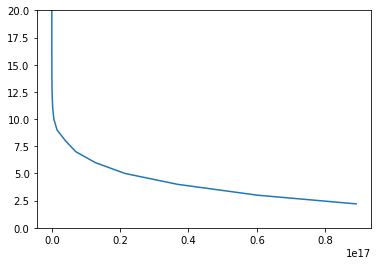

In [18]:
plt.plot(H2O,Z)
plt.ylim(0,20)

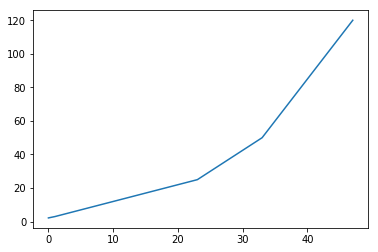

In [19]:
plt.plot(Z)

In [20]:
DZ=Z[1:NC-1]-Z[0:NC-2]   # Width of layers
Zmean=(Z[1:NC-1]+Z[0:NC-2])/2.   # average altitudes of layers

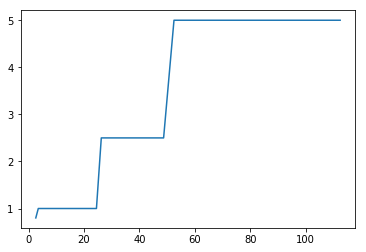

In [21]:
plt.plot(Zmean,DZ)

In [22]:
DZ

<Quantity [ 0.8, 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
            1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 2.5,
            2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 5. , 5. , 5. ,
            5. , 5. , 5. , 5. , 5. , 5. , 5. , 5. , 5. , 5. ] km>

In [23]:
vec_H2O=(DZ*H2O[0:NC-2]).decompose()

In [24]:
vec_H2O

<Quantity [  7.12568800e+25,  6.01716000e+25,  3.67723000e+25,
             2.14020000e+25,  1.27057000e+25,  7.02416000e+24,
             4.01170000e+24,  1.53852000e+24,  6.01796000e+23,
             2.74191000e+23,  1.23680000e+23,  6.01741000e+22,
             2.80881000e+22,  2.02500000e+22,  1.36749000e+22,
             1.13960000e+22,  9.67725000e+21,  8.32755000e+21,
             7.21110000e+21,  6.26063000e+21,  5.45523000e+21,
             4.80480000e+21,  4.19895000e+21,  9.22280000e+21,
             6.45075000e+21,  4.52420000e+21,  3.04457500e+21,
             2.15722500e+21,  1.53202500e+21,  1.04394250e+21,
             7.47137500e+20,  5.34255000e+20,  3.83250000e+20,
             5.58030000e+20,  3.01155000e+20,  1.52617500e+20,
             7.11060000e+19,  3.01525000e+19,  1.17901500e+19,
             3.92780000e+18,  1.13781500e+18,  3.03280000e+17,
             7.89480000e+16,  2.37800000e+16,  8.55610000e+15,
             3.00160000e+15] 1 / m2>

In [25]:
total_H2O=vec_H2O.sum()

In [26]:
print total_H2O*hum.Mw*u.g/u.mol/const.N_A

6464.69085905 g / m2


In [27]:
vec_PWV=(hum.Mw*u.g/u.mol/const.N_A*DZ*H2O[0:NC-2]).decompose()

In [28]:
vec_Air=(hum.Md*u.g/u.mol/const.N_A*DZ*Air[0:NC-2]).decompose()

In [29]:
vec_PWV

<Quantity [  2.13174000e+00,  1.80010978e+00,  1.10009003e+00,
             6.40267993e-01,  3.80107142e-01,  2.10136661e-01,
             1.20015097e-01,  4.60267785e-02,  1.80034911e-02,
             8.20277177e-03,  3.70004417e-03,  1.80018457e-03,
             8.40291161e-04,  6.05804451e-04,  4.09101990e-04,
             3.40925804e-04,  2.89507216e-04,  2.49129228e-04,
             2.15729209e-04,  1.87294692e-04,  1.63200129e-04,
             1.43741690e-04,  1.25616919e-04,  2.75911768e-04,
             1.92982374e-04,  1.35347185e-04,  9.10823253e-05,
             6.45361238e-05,  4.58324723e-05,  3.12308649e-05,
             2.23515666e-05,  1.59829164e-05,  1.14654102e-05,
             1.66941757e-05,  9.00943405e-06,  4.56574621e-06,
             2.12722624e-06,  9.02050307e-07,  3.52717301e-07,
             1.17505122e-07,  3.40391798e-08,  9.07300612e-09,
             2.36182962e-09,  7.11408882e-10,  2.55966591e-10,
             8.97966736e-11] kg / m2>

In [30]:
vec_Air

<Quantity [  7.88911049e+02,  9.09122419e+02,  8.19258739e+02,
             7.36403109e+02,  6.60127444e+02,  5.90099862e+02,
             5.25810511e+02,  4.67131447e+02,  4.13434495e+02,
             3.64767274e+02,  3.11883198e+02,  2.66547806e+02,
             2.27803443e+02,  1.94686202e+02,  1.66391384e+02,
             1.42276865e+02,  1.21618271e+02,  1.03966357e+02,
             8.88867859e+01,  7.57109801e+01,  6.44956966e+01,
             5.50009203e+01,  4.69345452e+01,  1.00181914e+02,
             6.77701679e+01,  4.60272986e+01,  3.13248252e+01,
             2.11603883e+01,  1.44584904e+01,  9.98592889e+00,
             6.97294876e+00,  4.91512195e+00,  3.50823324e+00,
             5.13362446e+00,  2.83857254e+00,  1.54442348e+00,
             8.13825938e-01,  4.14054493e-01,  2.00600957e-01,
             9.20935576e-02,  4.11264742e-02,  1.71485808e-02,
             7.02671160e-03,  2.85701857e-03,  1.20964123e-03,
             5.15308057e-04] kg / m2>

In [31]:
total_PWV=vec_PWV.sum()

In [32]:
print total_PWV

6.46469085905 kg / m2
